In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Data

In [59]:

aerosol = pd.read_csv("/content/drive/MyDrive/africap2/africa.csv")


In [52]:
aerosol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21756 entries, 0 to 63163
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Site                                          21756 non-null  object 
 1   Date(dd:mm:yyyy)                              21756 non-null  object 
 2   Time(hh:mm:ss)                                21756 non-null  object 
 3   Day_of_Year                                   21756 non-null  int64  
 4   Day_of_Year(Fraction)                         21756 non-null  float64
 5   AOD_Extinction-Total[440nm]                   21756 non-null  float64
 6   AOD_Extinction-Total[675nm]                   21756 non-null  float64
 7   AOD_Extinction-Total[870nm]                   21756 non-null  float64
 8   AOD_Extinction-Total[1020nm]                  21756 non-null  float64
 9   AOD_Extinction-Fine[440nm]                    21756 non-null  floa

In [53]:
aerosol['Site'].unique()

array(['Banizoumbou', 'Dakar', 'Ilorin', 'Cairo_University',
       'IER_Cinzana', 'Saada', 'Tamanrasset_TMP', 'ICIPE-Mbita',
       'Zinder_DMN', 'CRPSM_Malindi', 'Cairo_EMA_2', 'Henties_Bay',
       'Bujumbura', 'Mongu_Inn', 'SEGC_Lope_Gabon', 'CATUC_Bamenda',
       'UEM_Maputo'], dtype=object)

# EDA Before


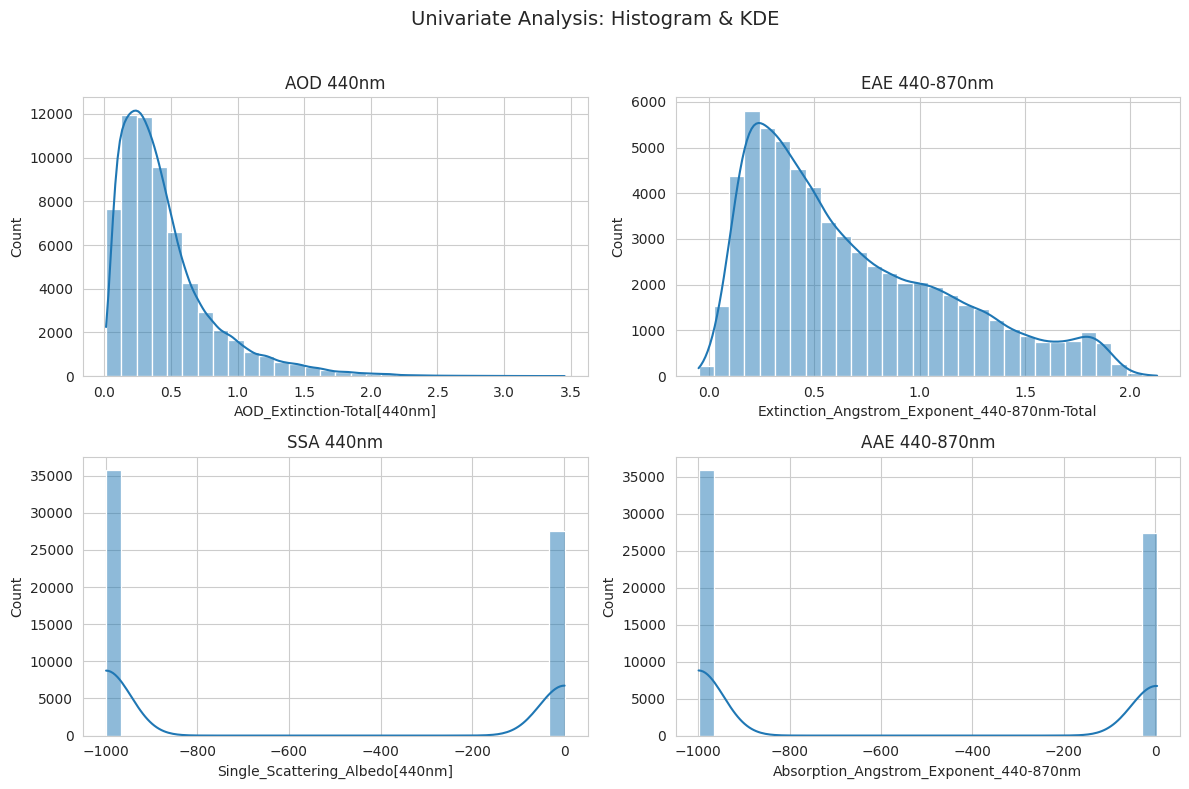

In [25]:
#kde and hist
col_titles = {
    "AOD_Extinction-Total[440nm]": "AOD 440nm",
    "Extinction_Angstrom_Exponent_440-870nm-Total": "EAE 440-870nm",
    "Single_Scattering_Albedo[440nm]": "SSA 440nm",
    "Absorption_Angstrom_Exponent_440-870nm": "AAE 440-870nm"
}

uni = list(col_titles.keys())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Univariate Analysis: Histogram & KDE", fontsize=14)

for idx, col in enumerate(uni):
    ax = axes[idx // 2, idx % 2]
    sns.histplot(aerosol[col], kde=True, bins=30, ax=ax)
    ax.set_title(col_titles[col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

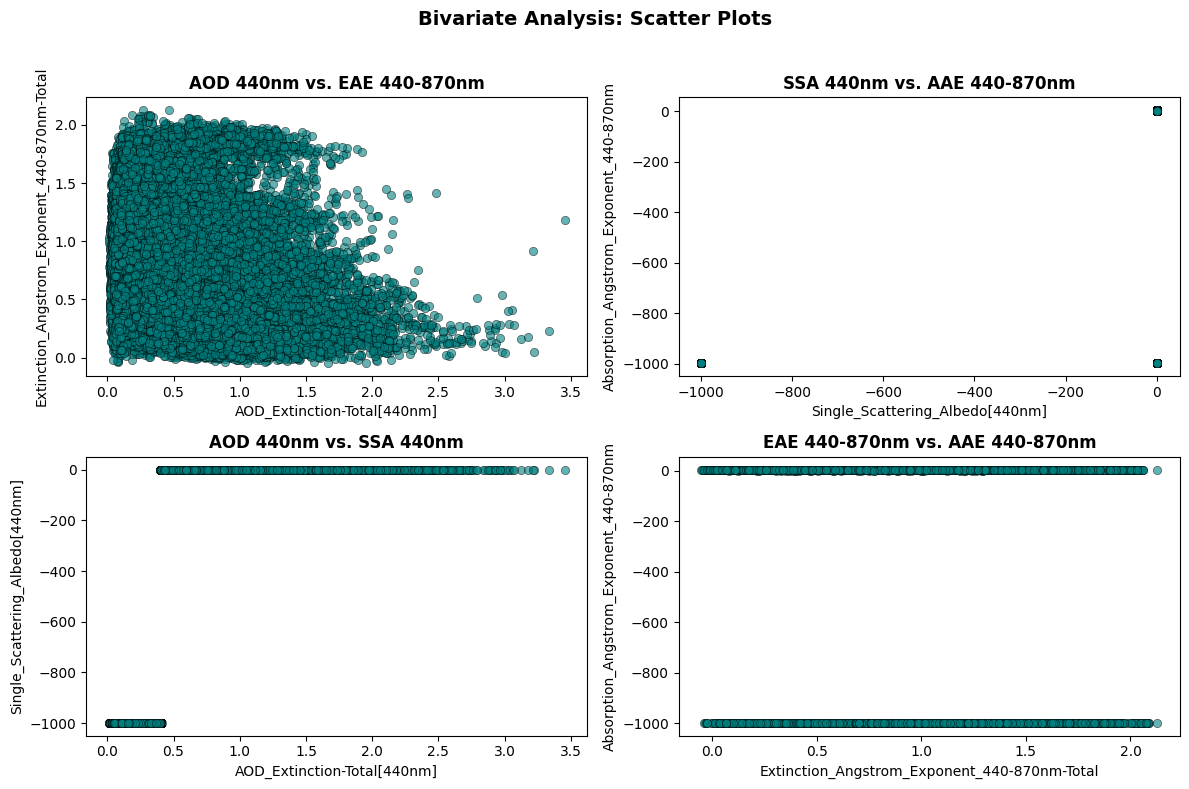

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Bivariate Analysis: Scatter Plots", fontsize=14, fontweight="bold")

bivariate_pairs = [
    ("AOD_Extinction-Total[440nm]", "Extinction_Angstrom_Exponent_440-870nm-Total"),
    ("Single_Scattering_Albedo[440nm]", "Absorption_Angstrom_Exponent_440-870nm"),
    ("AOD_Extinction-Total[440nm]", "Single_Scattering_Albedo[440nm]"),
    ("Extinction_Angstrom_Exponent_440-870nm-Total", "Absorption_Angstrom_Exponent_440-870nm")
]

titles = [
    "AOD 440nm vs. EAE 440-870nm",
    "SSA 440nm vs. AAE 440-870nm",
    "AOD 440nm vs. SSA 440nm",
    "EAE 440-870nm vs. AAE 440-870nm"
]

for idx, ((x_col, y_col), title) in enumerate(zip(bivariate_pairs, titles)):
    ax = axes[idx // 2, idx % 2]
    sns.scatterplot(data=aerosol, x=x_col, y=y_col, alpha=0.6, color="teal", edgecolor="black", ax=ax)
    ax.set_title(title, fontsize=12, fontweight="bold", color="black")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

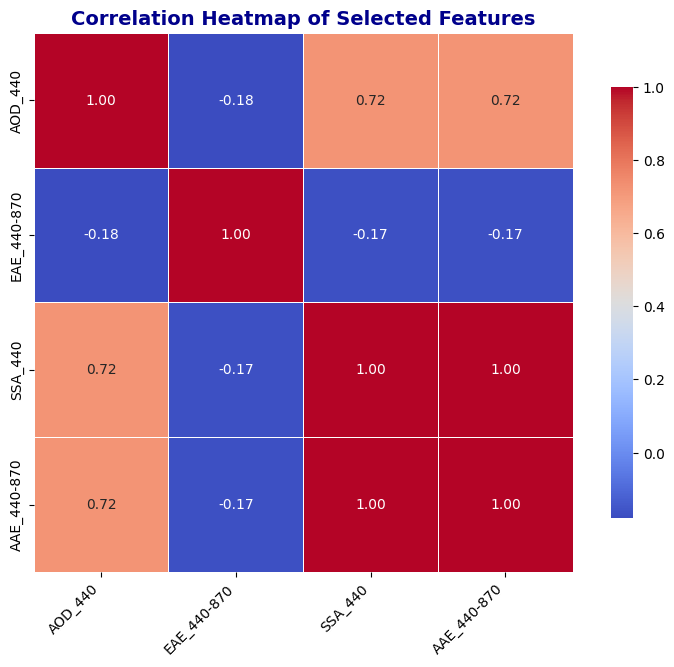

In [6]:
#correlation heatmap
short_labels = {
    "AOD_Extinction-Total[440nm]": "AOD_440",
    "Extinction_Angstrom_Exponent_440-870nm-Total": "EAE_440-870",
    "Single_Scattering_Albedo[440nm]": "SSA_440",
    "Absorption_Angstrom_Exponent_440-870nm": "AAE_440-870"
}

corr_data = aerosol[selected_cols].rename(columns=short_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Selected Features", fontsize=14, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Handling Missing Value

In [60]:
# Drop rows where any column has the value -999
aerosol_cleaned = aerosol[~(aerosol == -999).any(axis=1)]

# Assign the cleaned DataFrame back to aerosol
aerosol = aerosol_cleaned

# Verify the change
print(aerosol.shape)



(27352, 35)


# EDA After

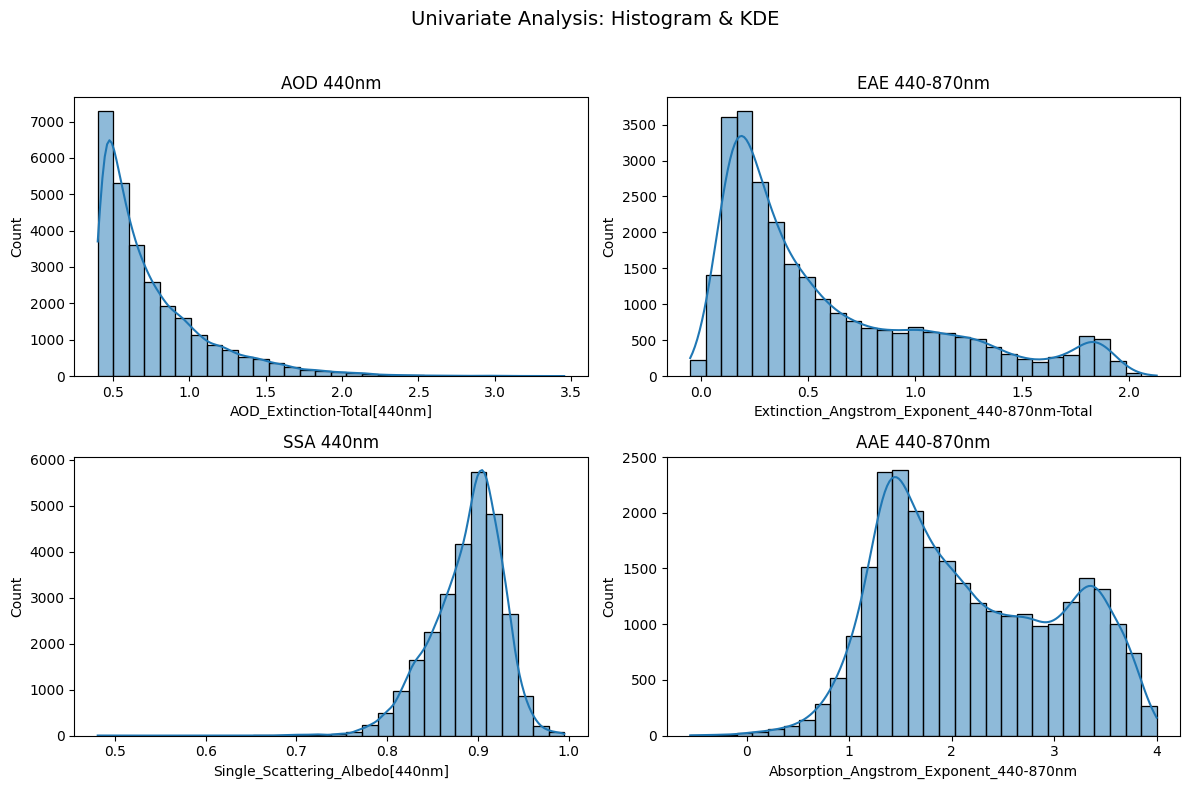

In [11]:
#kde and hist
col_titles = {
    "AOD_Extinction-Total[440nm]": "AOD 440nm",
    "Extinction_Angstrom_Exponent_440-870nm-Total": "EAE 440-870nm",
    "Single_Scattering_Albedo[440nm]": "SSA 440nm",
    "Absorption_Angstrom_Exponent_440-870nm": "AAE 440-870nm"
}

uni = list(col_titles.keys())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Univariate Analysis: Histogram & KDE", fontsize=14)

for idx, col in enumerate(uni):
    ax = axes[idx // 2, idx % 2]
    sns.histplot(aerosol[col], kde=True, bins=30, ax=ax)
    ax.set_title(col_titles[col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

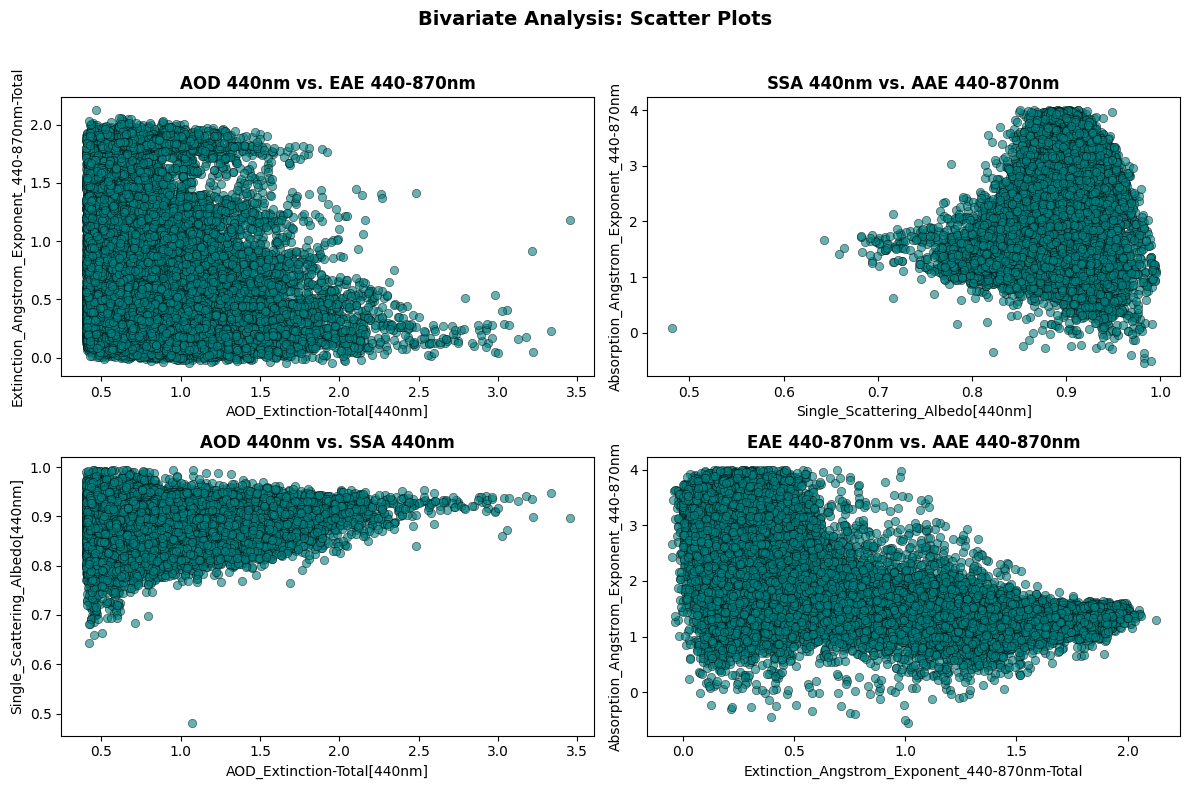

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Bivariate Analysis: Scatter Plots", fontsize=14, fontweight="bold")

bivariate_pairs = [
    ("AOD_Extinction-Total[440nm]", "Extinction_Angstrom_Exponent_440-870nm-Total"),
    ("Single_Scattering_Albedo[440nm]", "Absorption_Angstrom_Exponent_440-870nm"),
    ("AOD_Extinction-Total[440nm]", "Single_Scattering_Albedo[440nm]"),
    ("Extinction_Angstrom_Exponent_440-870nm-Total", "Absorption_Angstrom_Exponent_440-870nm")
]

titles = [
    "AOD 440nm vs. EAE 440-870nm",
    "SSA 440nm vs. AAE 440-870nm",
    "AOD 440nm vs. SSA 440nm",
    "EAE 440-870nm vs. AAE 440-870nm"
]

for idx, ((x_col, y_col), title) in enumerate(zip(bivariate_pairs, titles)):
    ax = axes[idx // 2, idx % 2]
    sns.scatterplot(data=aerosol, x=x_col, y=y_col, alpha=0.6, color="teal", edgecolor="black", ax=ax)
    ax.set_title(title, fontsize=12, fontweight="bold", color="black")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

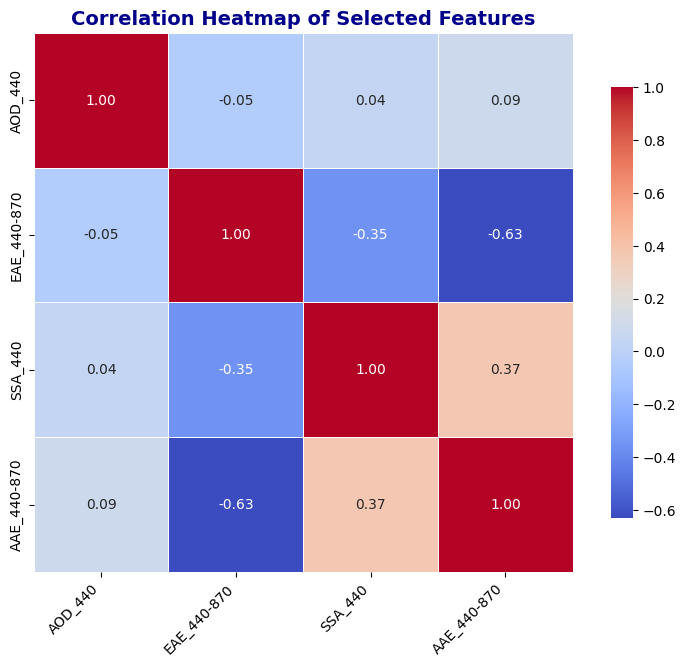

In [9]:
#correlation heatmap
short_labels = {
    "AOD_Extinction-Total[440nm]": "AOD_440",
    "Extinction_Angstrom_Exponent_440-870nm-Total": "EAE_440-870",
    "Single_Scattering_Albedo[440nm]": "SSA_440",
    "Absorption_Angstrom_Exponent_440-870nm": "AAE_440-870"
}

corr_data = aerosol[selected_cols].rename(columns=short_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Selected Features", fontsize=14, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Add calculated columns using Dubovik and King’s formulae and compute the differences with the provided data.

In [56]:
# adding calculated data cols according to Dubovik and King provided formulae and differnce with provided data
# Calculate EAE
aerosol["Calculated_EAE"] = -np.log(aerosol["AOD_Extinction-Total[440nm]"] / aerosol["AOD_Extinction-Total[870nm]"]) / np.log(440 / 870)


# Difference in EAE
aerosol["EAE_Difference"] = aerosol["Extinction_Angstrom_Exponent_440-870nm-Total"] - aerosol["Calculated_EAE"]

# Calculate AAOD and their differences for different wavelengths
for wl in ['440nm', '675nm', '870nm', '1020nm']:
    aerosol[f'Calculated_AAOD[{wl}]'] = aerosol[f'AOD_Extinction-Total[{wl}]'] * (1 - aerosol[f'Single_Scattering_Albedo[{wl}]'])
    aerosol[f'AAOD_Difference[{wl}]'] = aerosol[f'Absorption_AOD[{wl}]'] - aerosol[f'Calculated_AAOD[{wl}]']

# Calculate AAE
aerosol["Calculated_AAE"] = (-np.log(aerosol["Calculated_AAOD[870nm]"]) + np.log(aerosol["Calculated_AAOD[440nm]"])) / np.log(440 / 870)

# Difference in AAE
aerosol["AAE_Difference"] = aerosol["Absorption_Angstrom_Exponent_440-870nm"] - aerosol["Calculated_AAE"]

# Frequency Distribution of Aerosol Optical Properties Fig 2

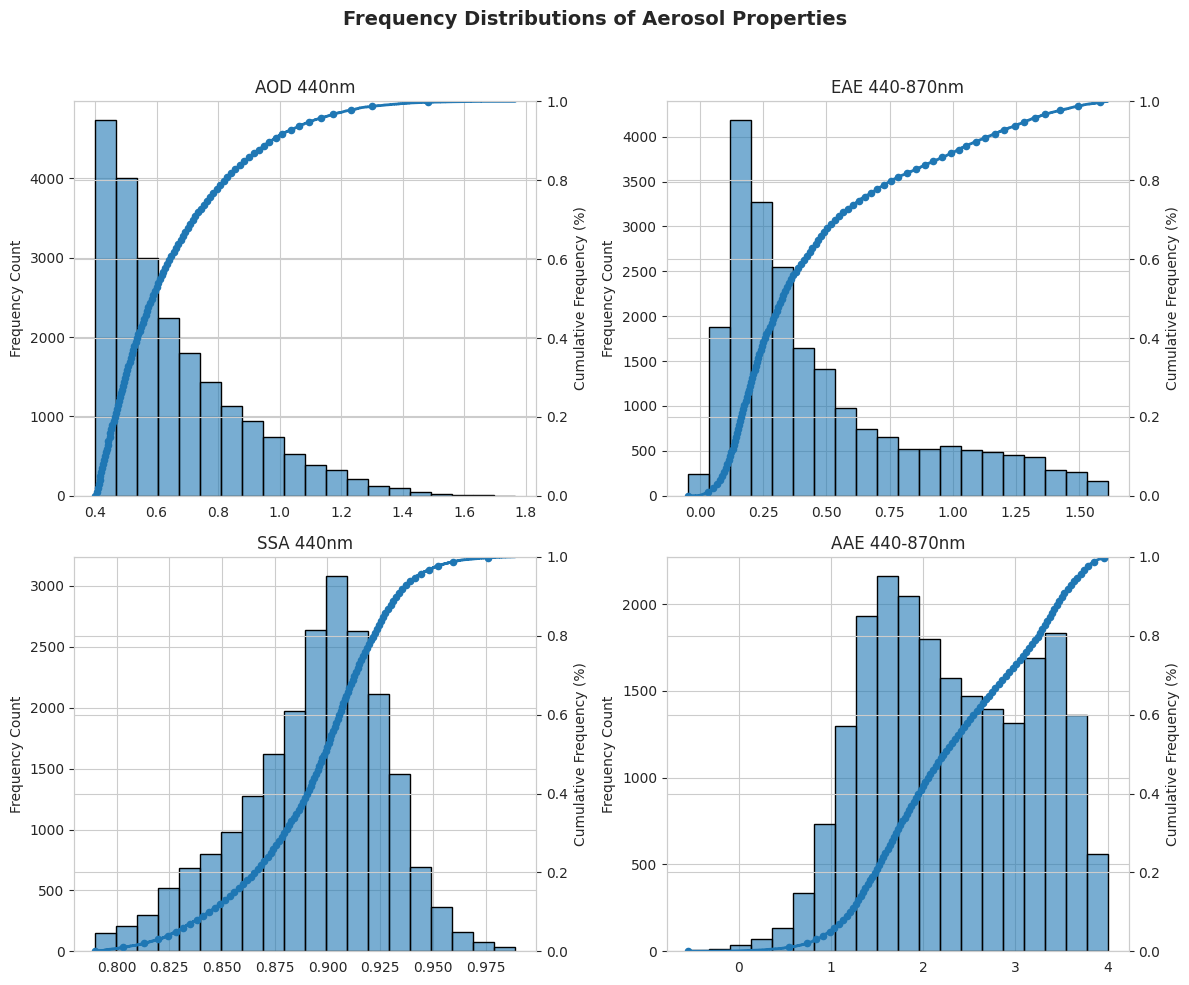

In [57]:

# Set style
sns.set_style("whitegrid")

# Define the columns for plotting
columns = {
    "AOD 440nm": "AOD_Extinction-Total[440nm]",
    "EAE 440-870nm": "Extinction_Angstrom_Exponent_440-870nm-Total",
    "SSA 440nm": "Single_Scattering_Albedo[440nm]",
    "AAE 440-870nm": "Absorption_Angstrom_Exponent_440-870nm"
}

# Define figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Frequency Distributions of Aerosol Properties", fontsize=14, fontweight="bold")

# Iterate over columns and axes
for ax, (title, col) in zip(axes.flatten(), columns.items()):
    # Plot histogram with increased bins
    sns.histplot(aerosol[col], bins=20, kde=False, edgecolor="black", alpha=0.6, ax=ax)

    # Overlay cumulative distribution with spaced dots
    ax2 = ax.twinx()
    sorted_data = np.sort(aerosol[col].dropna())  # Sort values & drop NaN
    spacing_factor = max(1, len(sorted_data) // 100)  # Adjust spacing dynamically
    sns.ecdfplot(sorted_data, ax=ax2, linewidth=2)  # Smooth ECDF
    ax2.scatter(sorted_data[::spacing_factor], np.linspace(0, 1, len(sorted_data))[::spacing_factor], s=20)  # Adds spaced dots

    # Formatting
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("Frequency Count")
    ax2.set_ylabel("Cumulative Frequency (%)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Fig. 3. Scatter plots of fine mode AODs, AAOD, EAE, AAE, SSA, and real refractive index.

In [14]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 99.8 MB/s eta 0:00:00


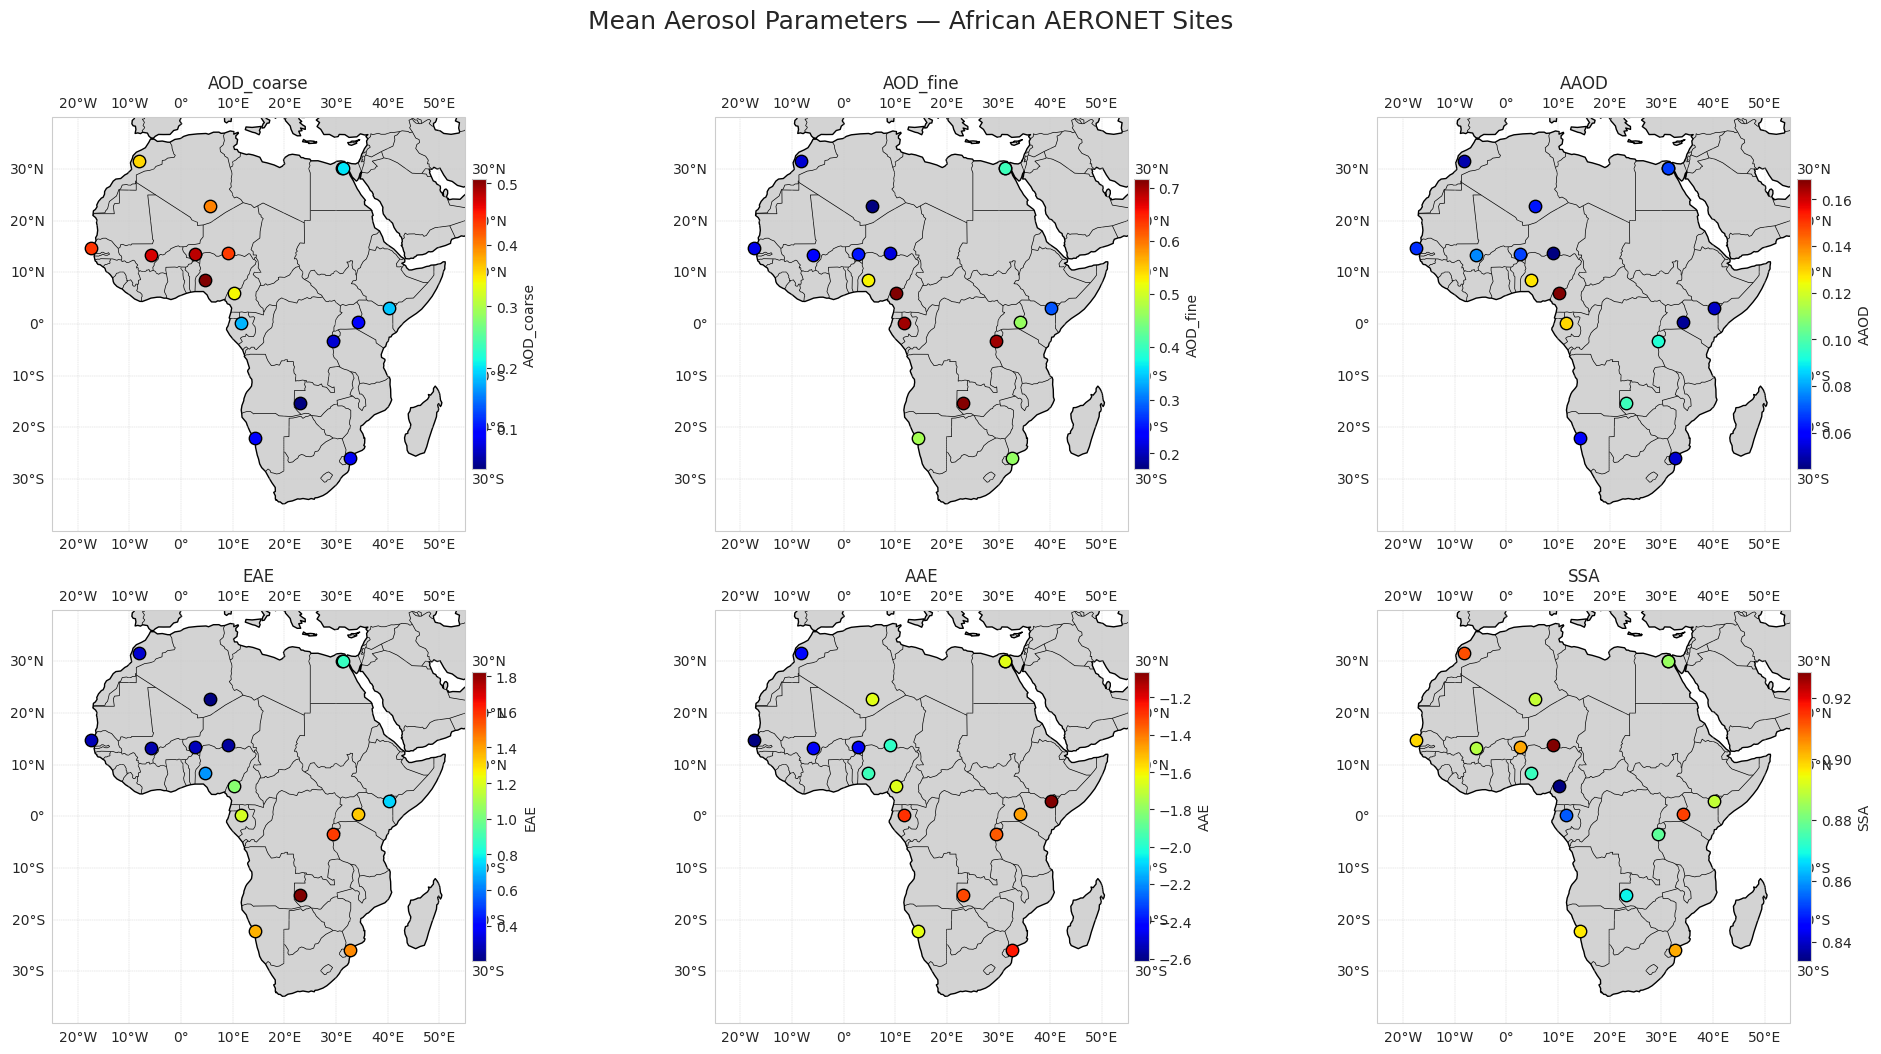

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Correct site coordinates (lat, lon)
site_coords = {
    'Banizoumbou': (13.5, 2.7),
    'Dakar': (14.7, -17.4),
    'Ilorin': (8.5, 4.7),
    'Cairo_University': (30.1, 31.2),
    'IER_Cinzana': (13.3, -5.9),
    'Saada': (31.6, -8.2),
    'Tamanrasset_TMP': (22.8, 5.5),
    'ICIPE-Mbita': (0.4, 34.2),
    'Zinder_DMN': (13.8, 9.0),
    'CRPSM_Malindi': (3.0, 40.2),
    'Cairo_EMA_2': (30.1, 31.3),
    'Henties_Bay': (-22.1, 14.3),
    'Bujumbura': (-3.4, 29.4),
    'Mongu_Inn': (-15.3, 23.1),
    'SEGC_Lope_Gabon': (0.2, 11.6),
    'CATUC_Bamenda': (5.9, 10.2),
    'UEM_Maputo': (-25.9, 32.6)
}

# Group to get mean values
mean_data = aerosol.groupby('Site').mean(numeric_only=True).reset_index()

# Column mappings: aerosol data → display name
fields = {
    'AOD_Extinction-Coarse[440nm]': 'AOD_coarse',
    'AOD_Extinction-Fine[440nm]': 'AOD_fine',
    'Absorption_AOD[440nm]': 'AAOD',
    'Extinction_Angstrom_Exponent_440-870nm-Total': 'EAE',
    'Calculated_AAE': 'AAE',
    'Single_Scattering_Albedo[440nm]': 'SSA'
}

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(20, 10),
                         subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, (col, title) in enumerate(fields.items()):
    ax = axes[i]
    ax.set_extent([-25, 55, -40, 40], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.set_title(title)
    ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.3)

    # Plot each site
    for site, (lat, lon) in site_coords.items():
        match = mean_data[mean_data['Site'].str.contains(site, case=False)]
        if not match.empty:
            value = match[col].values[0]
            scatter = ax.scatter(lon, lat, c=[value], cmap='jet',
                                 vmin=mean_data[col].min(),
                                 vmax=mean_data[col].max(),
                                 s=80, edgecolors='black',
                                 transform=ccrs.Geodetic(), zorder=3)

    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01, shrink=0.7)
    cbar.set_label(title)

# Layout
plt.tight_layout()
plt.suptitle("Mean Aerosol Parameters — African AERONET Sites", fontsize=18, y=1.05)
plt.show()


# Seasonal Mean and Uncertainty of Aerosol Optical Properties

In [17]:
aerosol['Date(dd:mm:yyyy)'] = pd.to_datetime(aerosol['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

# Extract the month from the 'Date' column
aerosol['Month'] = aerosol['Date(dd:mm:yyyy)'].dt.month

# Define a function to categorize months into seasons
def get_season(month):
    if month in [12, 1, 2]:  # DJF
        return 'DJF'
    elif month in [3, 4, 5]:  # MAM
        return 'MAM'
    elif month in [6, 7, 8]:  # JJA
        return 'JJA'
    else:  # SON
        return 'SON'

# Apply the function to categorize the months into seasons
aerosol['Season'] = aerosol['Month'].apply(get_season)

# Columns for AOD (fine and coarse modes), SSA, AAOD, EAE, and Absorption_Angstrom_Exponent_440-870nm
columns_of_interest = [
    'AOD_Extinction-Fine[440nm]',
    'AOD_Extinction-Coarse[440nm]',
    'Single_Scattering_Albedo[440nm]',
    'Absorption_AOD[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm'
]

# Group by 'Season' and calculate the mean and std for each season
uncertainty_values_by_season = {}

# Group by season
grouped_by_season = aerosol.groupby('Season')

# For each group (season), calculate the mean and std for each parameter
for season, group in grouped_by_season:
    season_uncertainty = {}
    for col in columns_of_interest:
        mean_value = group[col].mean()
        std_value = group[col].std()
        season_uncertainty[col] = f"{mean_value:.2f} ± {std_value:.2f}"

    uncertainty_values_by_season[season] = season_uncertainty

# Convert the result into a DataFrame
uncertainty_df_by_season = pd.DataFrame.from_dict(uncertainty_values_by_season, orient='index')

# Print the uncertainty DataFrame
print(uncertainty_df_by_season)


    AOD_Extinction-Fine[440nm] AOD_Extinction-Coarse[440nm]  \
DJF                0.49 ± 0.27                  0.41 ± 0.28   
JJA                0.31 ± 0.22                  0.34 ± 0.26   
MAM                0.26 ± 0.14                  0.48 ± 0.29   
SON                0.39 ± 0.27                  0.26 ± 0.21   

    Single_Scattering_Albedo[440nm] Absorption_AOD[440nm]  \
DJF                     0.86 ± 0.04           0.12 ± 0.06   
JJA                     0.90 ± 0.03           0.07 ± 0.03   
MAM                     0.90 ± 0.03           0.07 ± 0.03   
SON                     0.90 ± 0.04           0.06 ± 0.03   

    Extinction_Angstrom_Exponent_440-870nm-Total  \
DJF                                  0.67 ± 0.36   
JJA                                  0.60 ± 0.62   
MAM                                  0.31 ± 0.26   
SON                                  0.83 ± 0.63   

    Absorption_Angstrom_Exponent_440-870nm  
DJF                            1.97 ± 0.71  
JJA                        

In [61]:
import numpy as np
import pandas as pd

# List of columns you want to clean
cols = [
    'AOD_Extinction-Fine[440nm]',
    'AOD_Extinction-Coarse[440nm]',

    'Absorption_AOD[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm'
]

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
    return df_cleaned

# Apply outlier removal
aerosol = remove_outliers_iqr(aerosol, cols)

print("✅ Outliers removed. aerosol shape:", aerosol.shape)


✅ Outliers removed. aerosol shape: (22372, 35)


# Spectral Clustering of Aerosol Optical Properties

In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Step 1: Select the needed columns
features = [
    'AOD_Extinction-Fine[440nm]',
    'Extinction_Angstrom_Exponent_440-870nm-Total',
    'Absorption_Angstrom_Exponent_440-870nm',
    'Single_Scattering_Albedo[440nm]',
    'Refractive_Index-Real_Part[440nm]'
]

# Step 2: Create a feature matrix
X = aerosol[features].copy()

# Step 3: Drop any NaNs (if any)
X = X.dropna()

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply Spectral Clustering
# - 3 clusters (Dust, Biomass, Mixed)
# - Nearest neighbors affinity
clustering = SpectralClustering(
    n_clusters=3,
    assign_labels='kmeans',
    affinity='nearest_neighbors',
    n_neighbors=12,   # As per paper
    random_state=42,
    n_init=12          # 12 initializations (very important)
)

# Fit the clustering
labels = clustering.fit_predict(X_scaled)

# Step 6: Assign cluster labels back to your DataFrame
aerosol['Cluster'] = -1
aerosol.loc[X.index, 'Cluster'] = labels

# Step 7: Calculate cluster centroids (original, not scaled!)
centroids = aerosol.loc[X.index].groupby('Cluster')[features].mean()

# Display final centroids
print("Cluster Centroids:")
print(centroids)


Cluster Centroids:
         AOD_Extinction-Fine[440nm]  \
Cluster                               
0                          0.215594   
1                          0.457056   
2                          0.216806   

         Extinction_Angstrom_Exponent_440-870nm-Total  \
Cluster                                                 
0                                            0.232851   
1                                            0.971498   
2                                            0.321784   

         Absorption_Angstrom_Exponent_440-870nm  \
Cluster                                           
0                                      3.231944   
1                                      1.558446   
2                                      1.922771   

         Single_Scattering_Albedo[440nm]  Refractive_Index-Real_Part[440nm]  
Cluster                                                                      
0                               0.912852                           1.444519  
1        

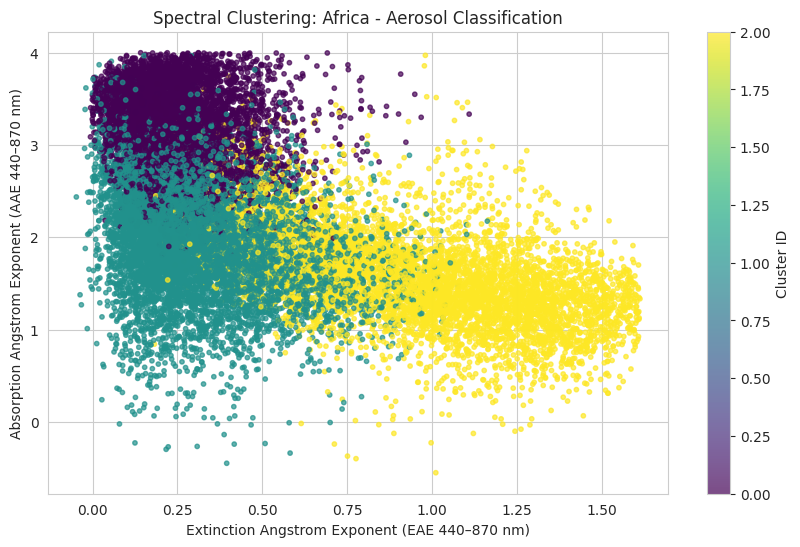

In [48]:
import matplotlib.pyplot as plt

# Create a scatter plot: EAE vs AAE colored by cluster
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    aerosol.loc[X.index, 'Extinction_Angstrom_Exponent_440-870nm-Total'],  # EAE
    aerosol.loc[X.index, 'Absorption_Angstrom_Exponent_440-870nm'],         # AAE
    c=aerosol.loc[X.index, 'Cluster'],
    cmap='viridis',  # or you can try 'tab10' for more colorful
    s=10,
    alpha=0.7
)

plt.title('Spectral Clustering: Africa - Aerosol Classification')
plt.xlabel('Extinction Angstrom Exponent (EAE 440–870 nm)')
plt.ylabel('Absorption Angstrom Exponent (AAE 440–870 nm)')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()


In [49]:
import numpy as np

# Given physical centroids (Biomass, Dust, Mixed)
reference_centroids = {
    'B': np.array([0.57, 1.17, 1.46, 0.88, 1.44]),
    'D': np.array([0.24, 0.25, 3.01, 0.92, 1.44]),
    'M': np.array([0.22, 0.33, 2.02, 0.88, 1.50])
}

# Your cluster centroids
cluster_centroids = aerosol.loc[X.index].groupby('Cluster')[
    ['AOD_Extinction-Fine[440nm]',
     'Extinction_Angstrom_Exponent_440-870nm-Total',
     'Absorption_Angstrom_Exponent_440-870nm',
     'Single_Scattering_Albedo[440nm]',
     'Refractive_Index-Real_Part[440nm]']
].mean()

# Now calculate distance between each cluster centroid and physical centroid
mapping = {}
for cluster_id, centroid in cluster_centroids.iterrows():
    distances = {}
    for label, ref in reference_centroids.items():
        distances[label] = np.linalg.norm(centroid.values - ref)
    # Choose the label with the minimum distance
    mapping[cluster_id] = min(distances, key=distances.get)

# Final mapping result
print("Cluster Mapping (Cluster ID ➔ Aerosol Type):")
for k, v in mapping.items():
    print(f"Cluster {k}: {v}")

# Now you can also create a new column with mapped names if you want
aerosol['Aerosol_Type'] = aerosol['Cluster'].map(mapping)


Cluster Mapping (Cluster ID ➔ Aerosol Type):
Cluster 0: D
Cluster 1: M
Cluster 2: B


In [50]:
# Count number of points in each Aerosol Type
type_counts = aerosol['Aerosol_Type'].value_counts()

# Calculate percentages
type_percentages = (type_counts / type_counts.sum()) * 100

# Display nicely
print("Percentage of each Aerosol Type:")
print(type_percentages.round(2))  # Round to 2 decimals


Percentage of each Aerosol Type:
Aerosol_Type
D    36.37
M    35.32
B    28.31
Name: count, dtype: float64


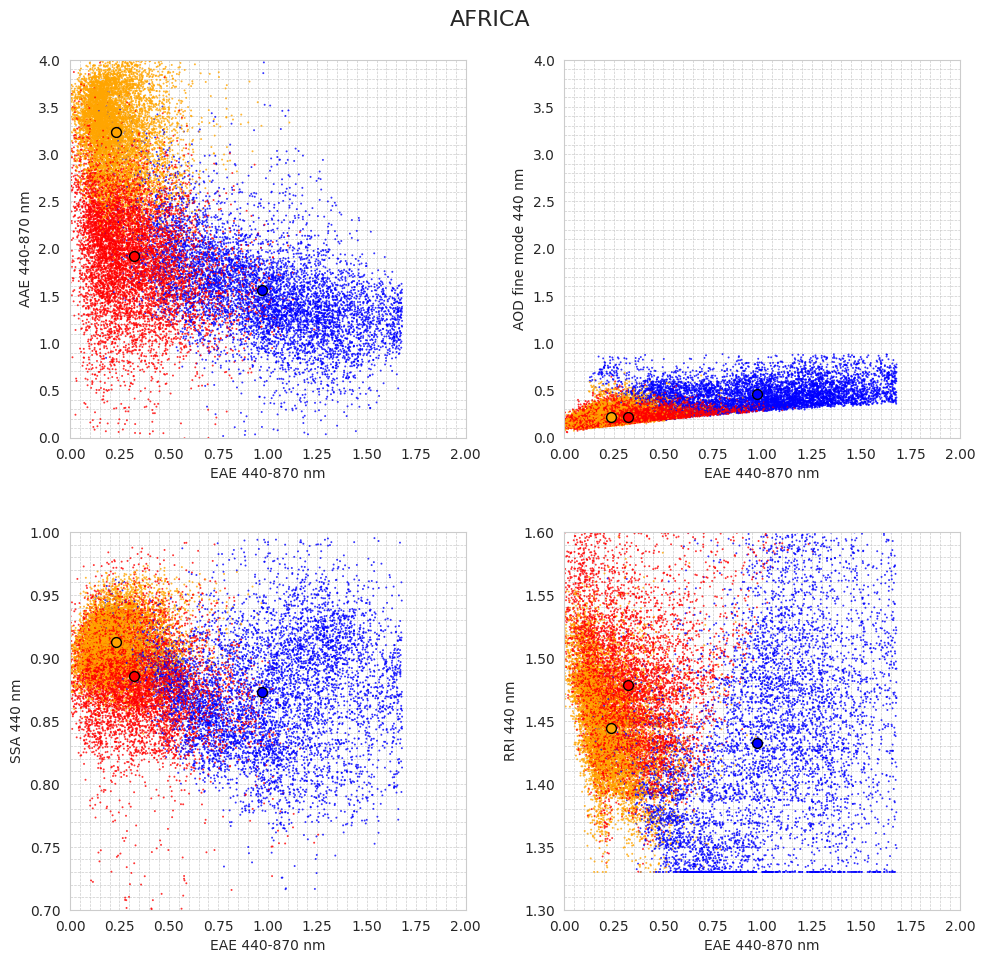

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Feature columns
eae_col = 'Extinction_Angstrom_Exponent_440-870nm-Total'
aae_col = 'Absorption_Angstrom_Exponent_440-870nm'
aod_fine_col = 'AOD_Extinction-Fine[440nm]'
ssa_col = 'Single_Scattering_Albedo[440nm]'
rri_col = 'Refractive_Index-Real_Part[440nm]'

# Cluster labels
clusters = aerosol.loc[X.index, 'Cluster']

# Color map manual
color_order = {0: 'orange', 1: 'blue', 2: 'red'}
colors = [color_order[c] for c in clusters]

# Cluster centroids
centroids = aerosol.loc[X.index].groupby('Cluster')[[eae_col, aae_col, aod_fine_col, ssa_col, rri_col]].mean()

# Start figure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

scatter_kwargs = {'s': 2, 'alpha': 0.8, 'linewidths': 0}

# First plot: EAE vs AAE
ax = axes[0, 0]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, aae_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[aae_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(0, 4)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('AAE 440-870 nm')

# Second plot: EAE vs Fine mode AOD
ax = axes[0, 1]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, aod_fine_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[aod_fine_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(0, 4)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('AOD fine mode 440 nm')

# Third plot: EAE vs SSA
ax = axes[1, 0]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, ssa_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[ssa_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(0.7, 1.0)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('SSA 440 nm')

# Fourth plot: EAE vs RRI
ax = axes[1, 1]
ax.scatter(aerosol.loc[X.index, eae_col], aerosol.loc[X.index, rri_col], c=colors, **scatter_kwargs)
for i, row in centroids.iterrows():
    ax.scatter(row[eae_col], row[rri_col], color=color_order[i], edgecolors='black', s=50)
ax.set_xlim(0, 2)
ax.set_ylim(1.3, 1.6)
ax.set_xlabel('EAE 440-870 nm')
ax.set_ylabel('RRI 440 nm')

# Grid styling
for ax in axes.flat:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()

# Adjust spacing
plt.subplots_adjust(left=0.08, right=0.97, top=0.93, bottom=0.08, wspace=0.25, hspace=0.25)

fig.suptitle('AFRICA', fontsize=16)
plt.show()
